## Principles and Applications of Data Science (Spring 2020)
## Homework 3
## Due: June 24, 2020

### Name:廖勗宏
### Student ID Number:105820024

### Homework Description
This assignment is to practice how to generate a linear regression from a numeric dataset.We provide the weather data ﬁle (`Weather_2009_2016.csv`) for practice. In the dataset, there are twelve attributes; however, we only interest the eleven attributes for exploring the linear regression. These attributes are 
<font color=green>
1. Temperature (degC) 
2. Pressure (mbar)     
3. Tdew (degC)        
4. rh (%)             
5. VPdef (mbar)       
6. sh (g/kg)          
7. H2OC (mmol/mol)    
8. rho (g/m^3)       
9. wv (m/s)          
10. max. wv (m/s)      
11. wd (deg)            
</font>

The last ten columns are independent variables and the first one is the dependent variable. Assume the linear regression can be denoted as
$$ \textbf{y}  =  c + a_1 \textbf{x}_1  + \dots + a_{10} \textbf{x}_{10} $$
$y$ is the dependent variable, $x_i$'s are independent variables, $c$ is the constant and $a_i$ are the coeﬃcients of the linear regression. Please show the coeﬃcients of the linear regression in order (i.e., $c, a_1, a_2,..., a_{10}$) with the following approaches:

1. Calculate the linear regression from the raw data directly. (You can choose one of the approaches in class for implementation; of course, you must make sure that you won't get a singular matrix if you use the matrix approach.)
2. Generate a *heatmap* for the diagonal correlation matrix with attributes and show your observation.
3. Explore multiple variables with *scatter plot*. The scatter plot of Pandas is a grid of plots of multiple variables one against the other, showing the relationship of each variable to the others. Please state what you observe.
4. Improve the linear regression from question 1 and get a new linear regression if the coeﬃcients  are meaningless.


In [1]:
from itertools import islice
import pandas as pd
import numpy as np

data = pd.read_csv("Weather_2009_2016.csv")
print('Keys:', data.keys())
data.info()
data.head()

Keys: Index(['Date Time', 'Temperature (degC)', 'Pressure (mbar)', 'Tdew (degC)',
       'rh (%)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 12 columns):
Date Time             420551 non-null object
Temperature (degC)    420551 non-null float64
Pressure (mbar)       420551 non-null float64
Tdew (degC)           420551 non-null float64
rh (%)                420551 non-null float64
VPdef (mbar)          420551 non-null float64
sh (g/kg)             420551 non-null float64
H2OC (mmol/mol)       420551 non-null float64
rho (g/m**3)          420551 non-null float64
wv (m/s)              420551 non-null float64
max. wv (m/s)         420551 non-null float64
wd (deg)              420551 non-null float64
dtypes: float64(11), object(1)
memory usage: 38.5+ MB


Date Time  Temperature (degC)  Pressure (mbar)  Tdew (degC)  \
0  01.01.2009 00:10:00               -8.02           996.52        -8.90   
1  01.01.2009 00:20:00               -8.41           996.57        -9.28   
2  01.01.2009 00:30:00               -8.51           996.53        -9.31   
3  01.01.2009 00:40:00               -8.31           996.51        -9.07   
4  01.01.2009 00:50:00               -8.27           996.51        -9.04   

   rh (%)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  \
0    93.3          0.22       1.94             3.12       1307.75      1.03   
1    93.4          0.21       1.89             3.03       1309.80      0.72   
2    93.9          0.20       1.88             3.02       1310.24      0.19   
3    94.2          0.19       1.92             3.08       1309.19      0.34   
4    94.1          0.19       1.92             3.09       1309.00      0.32   

   max. wv (m/s)  wd (deg)  
0           1.75     152.3  
1           1.50     136.1  
2           0.63     171.6  
3           0.50     198.0  
4           0.63     214.3

### 1.linear regression

In [43]:
#train_size = int(data.shape[0]*0.8)# train:test 8:2
X = data.drop(['Date Time','Temperature (degC)'],axis = 1)
y = data['Temperature (degC)']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)#random split 8:2

In [4]:
from sklearn import linear_model

print('Training and testing set sizes', X_train.shape, X_test.shape)
Weather = linear_model.LinearRegression()
Weather.fit(X_train, y_train) 
print('Coeff and intercept:', Weather.coef_, Weather.intercept_)
# Best possible score is 1.0, lower values are worse.
print('Training Score:', Weather.score(X_train, y_train)) 
print('Testing Score:', Weather.score(X_test, y_test)) 
print('Training MSE: ', np.mean((Weather.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((Weather.predict(X_test) - y_test)**2))

Training and testing set sizes (336440, 10) (84111, 10)
Coeff and intercept: [ 2.52200369e-01 -2.17751293e-02 -8.27121942e-03  1.14295074e-01
 -6.78434221e+00  4.36729866e+00 -2.00551932e-01 -2.89121487e-07
  2.63694994e-07  3.36150493e-05] 2.879197199584799
Training Score: 0.9998954535695171
Testing Score: 0.9998944796371687
Training MSE:  0.007407262126109872
Testing MSE:  0.007529797268595095


Text(0,0.5,'Predicted Temperature ')

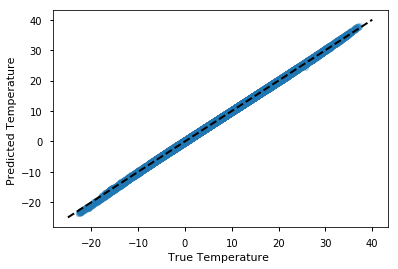

In [33]:
import matplotlib.pylab as plt
%matplotlib inline 
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
plt.scatter(y_test, predicted, alpha = 0.3)
plt.plot([-25, 40], [-25, 40], '--k')
plt.axis('tight')
plt.xlabel('True Temperature ')
plt.ylabel('Predicted Temperature ')

### 2.heatmap 

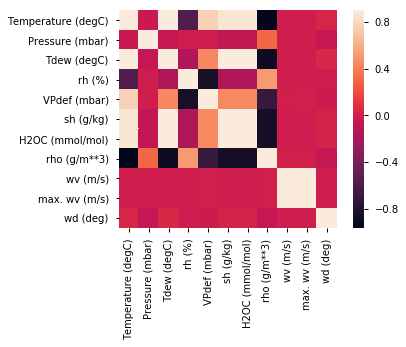

In [8]:
import seaborn as sns
#sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
df = data.drop(['Date Time'],axis = 1)
corrmat = df.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .9, square = True)

1. Pressure (mbar),wv (m/s),max. wv (m/s),wd (deg) 和其他屬性(尤其Temperature (degC))關聯性較小
2. Tdew (degC),rh (%), VPdef (mbar), sh (g/kg), H2OC (mmol/mol),rho (g/m**3)和Temperature (degC)互相關聯性大。

### 3.Explore multiple variables with scatter plot

Index(['Date Time', 'Temperature (degC)', 'Pressure (mbar)', 'Tdew (degC)',
       'rh (%)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B333C0390>,
      dtype=object)

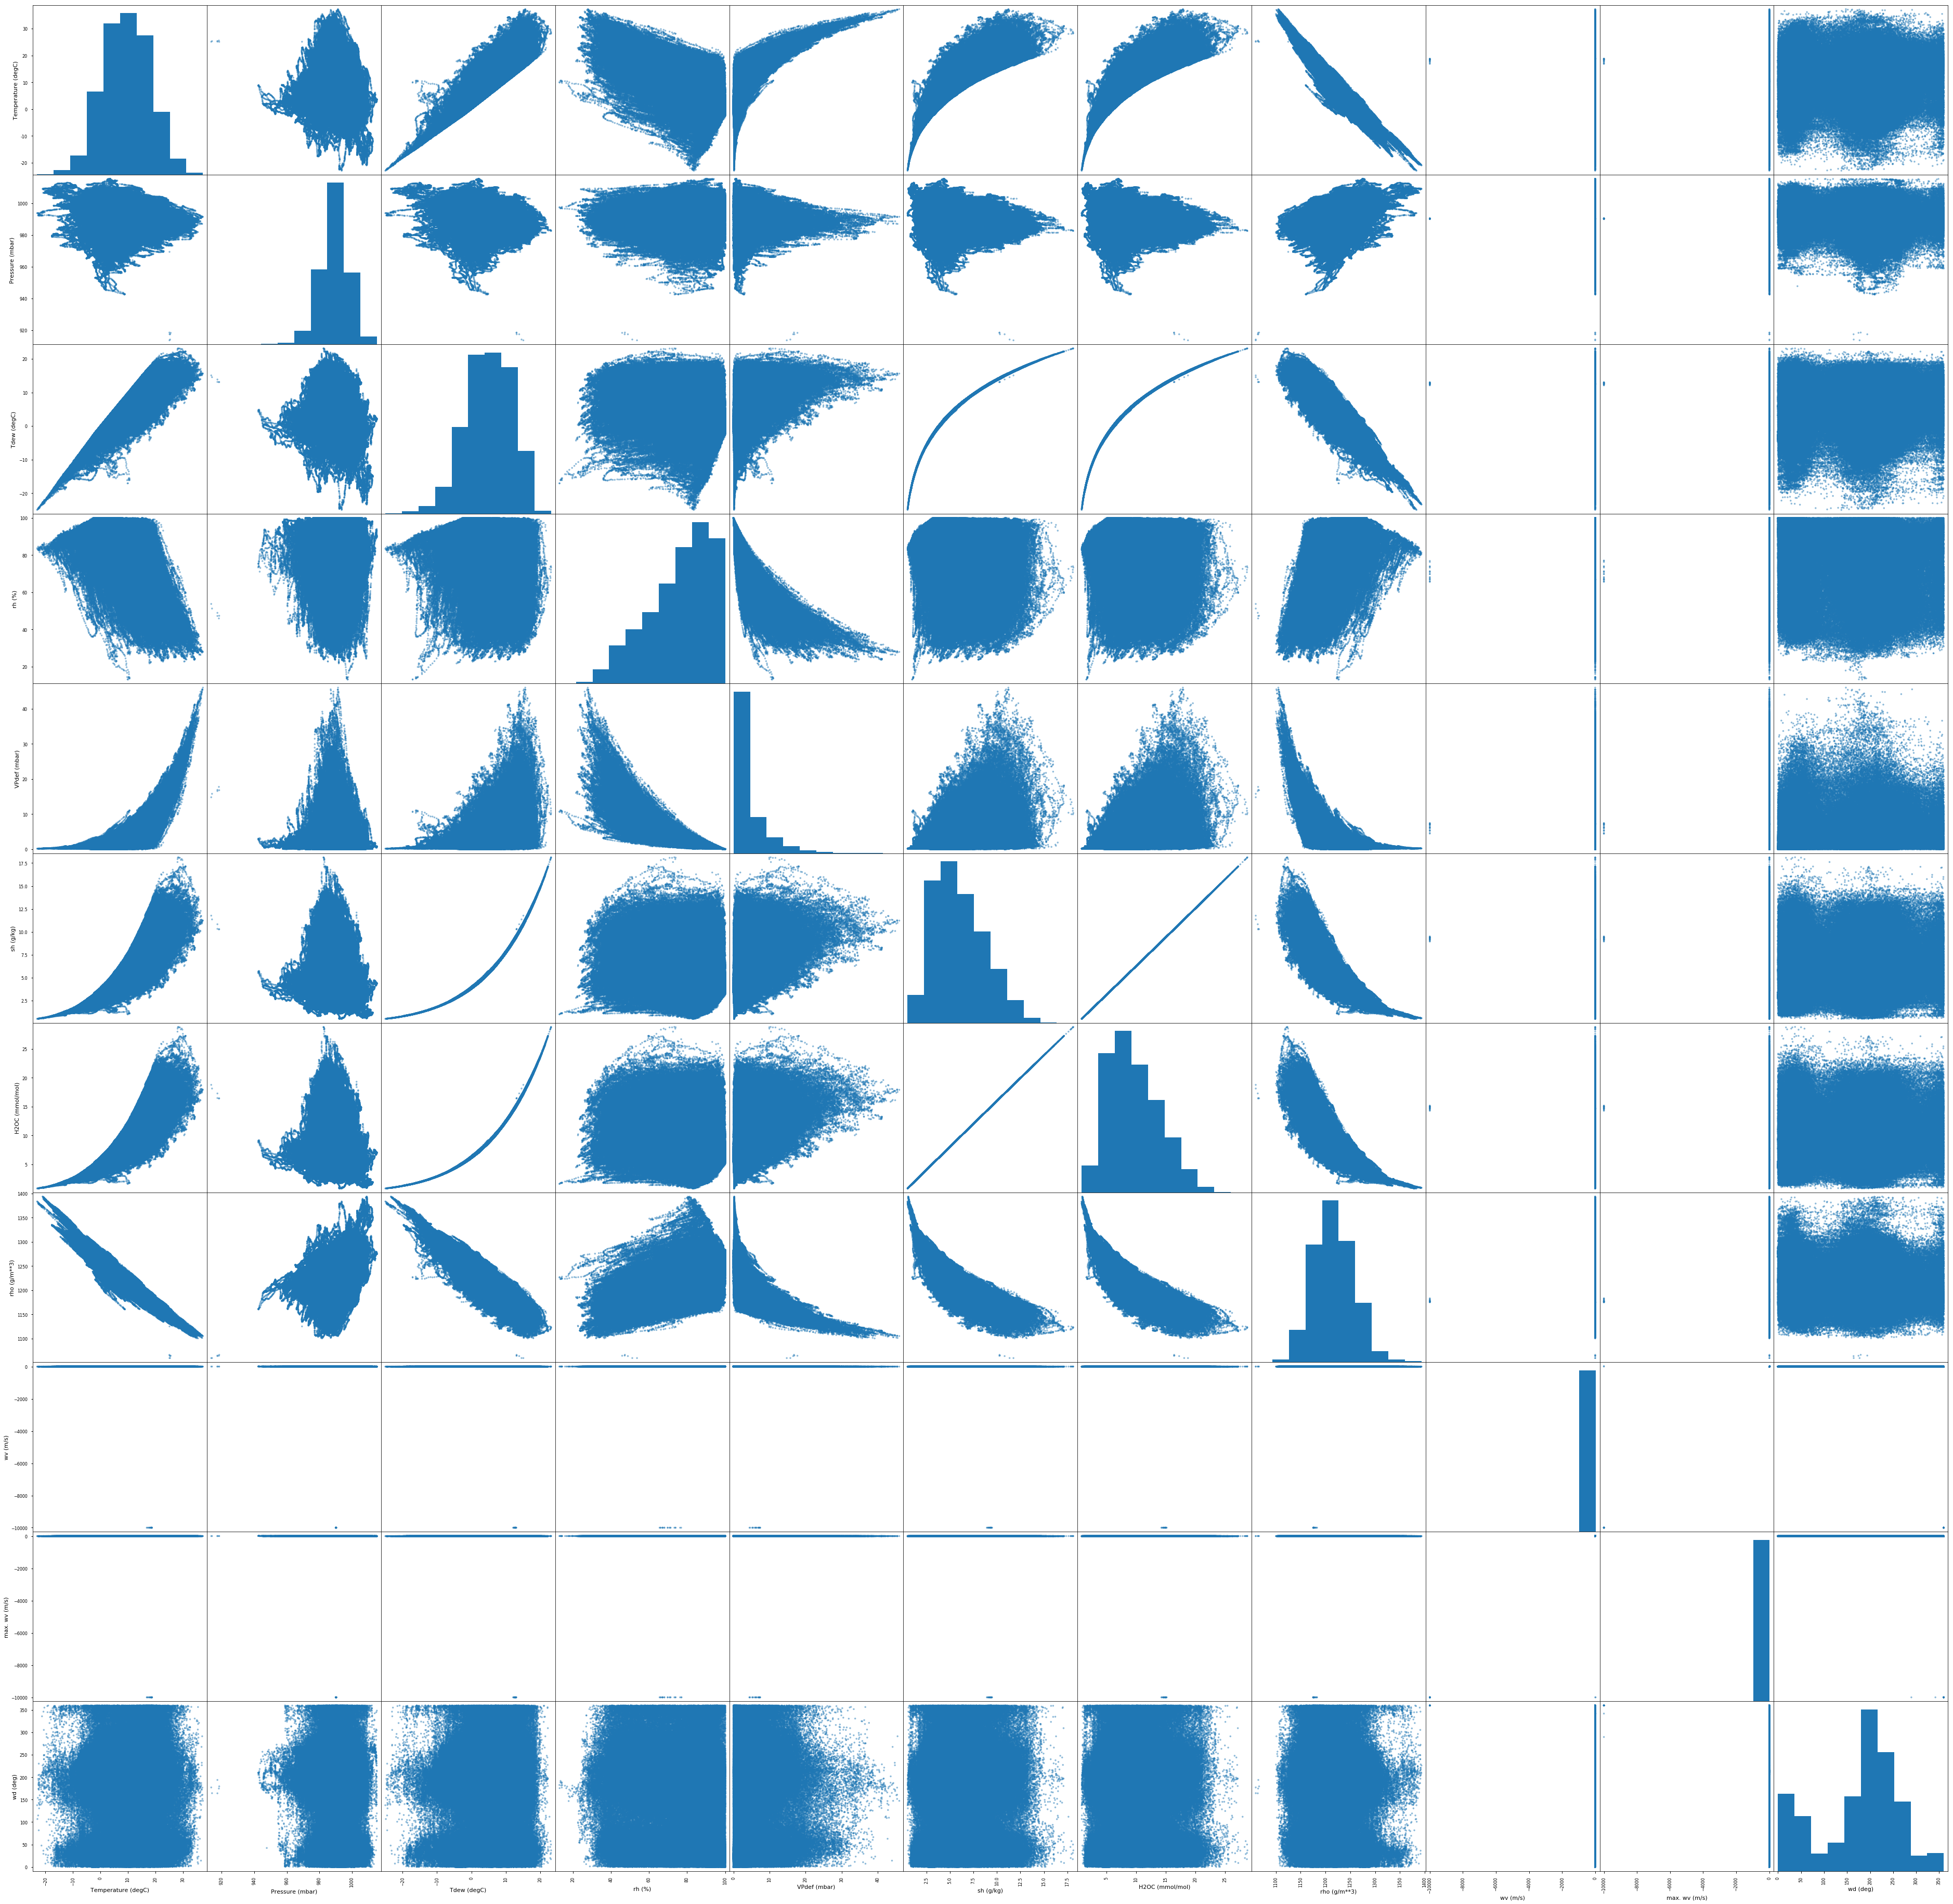

In [22]:
print(data.columns)
df_scatter = data.drop(['Date Time'],axis = 1)
pd.plotting.scatter_matrix(df_scatter, figsize = (66.0, 66.0))  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B1502B080>,
      dtype=object)

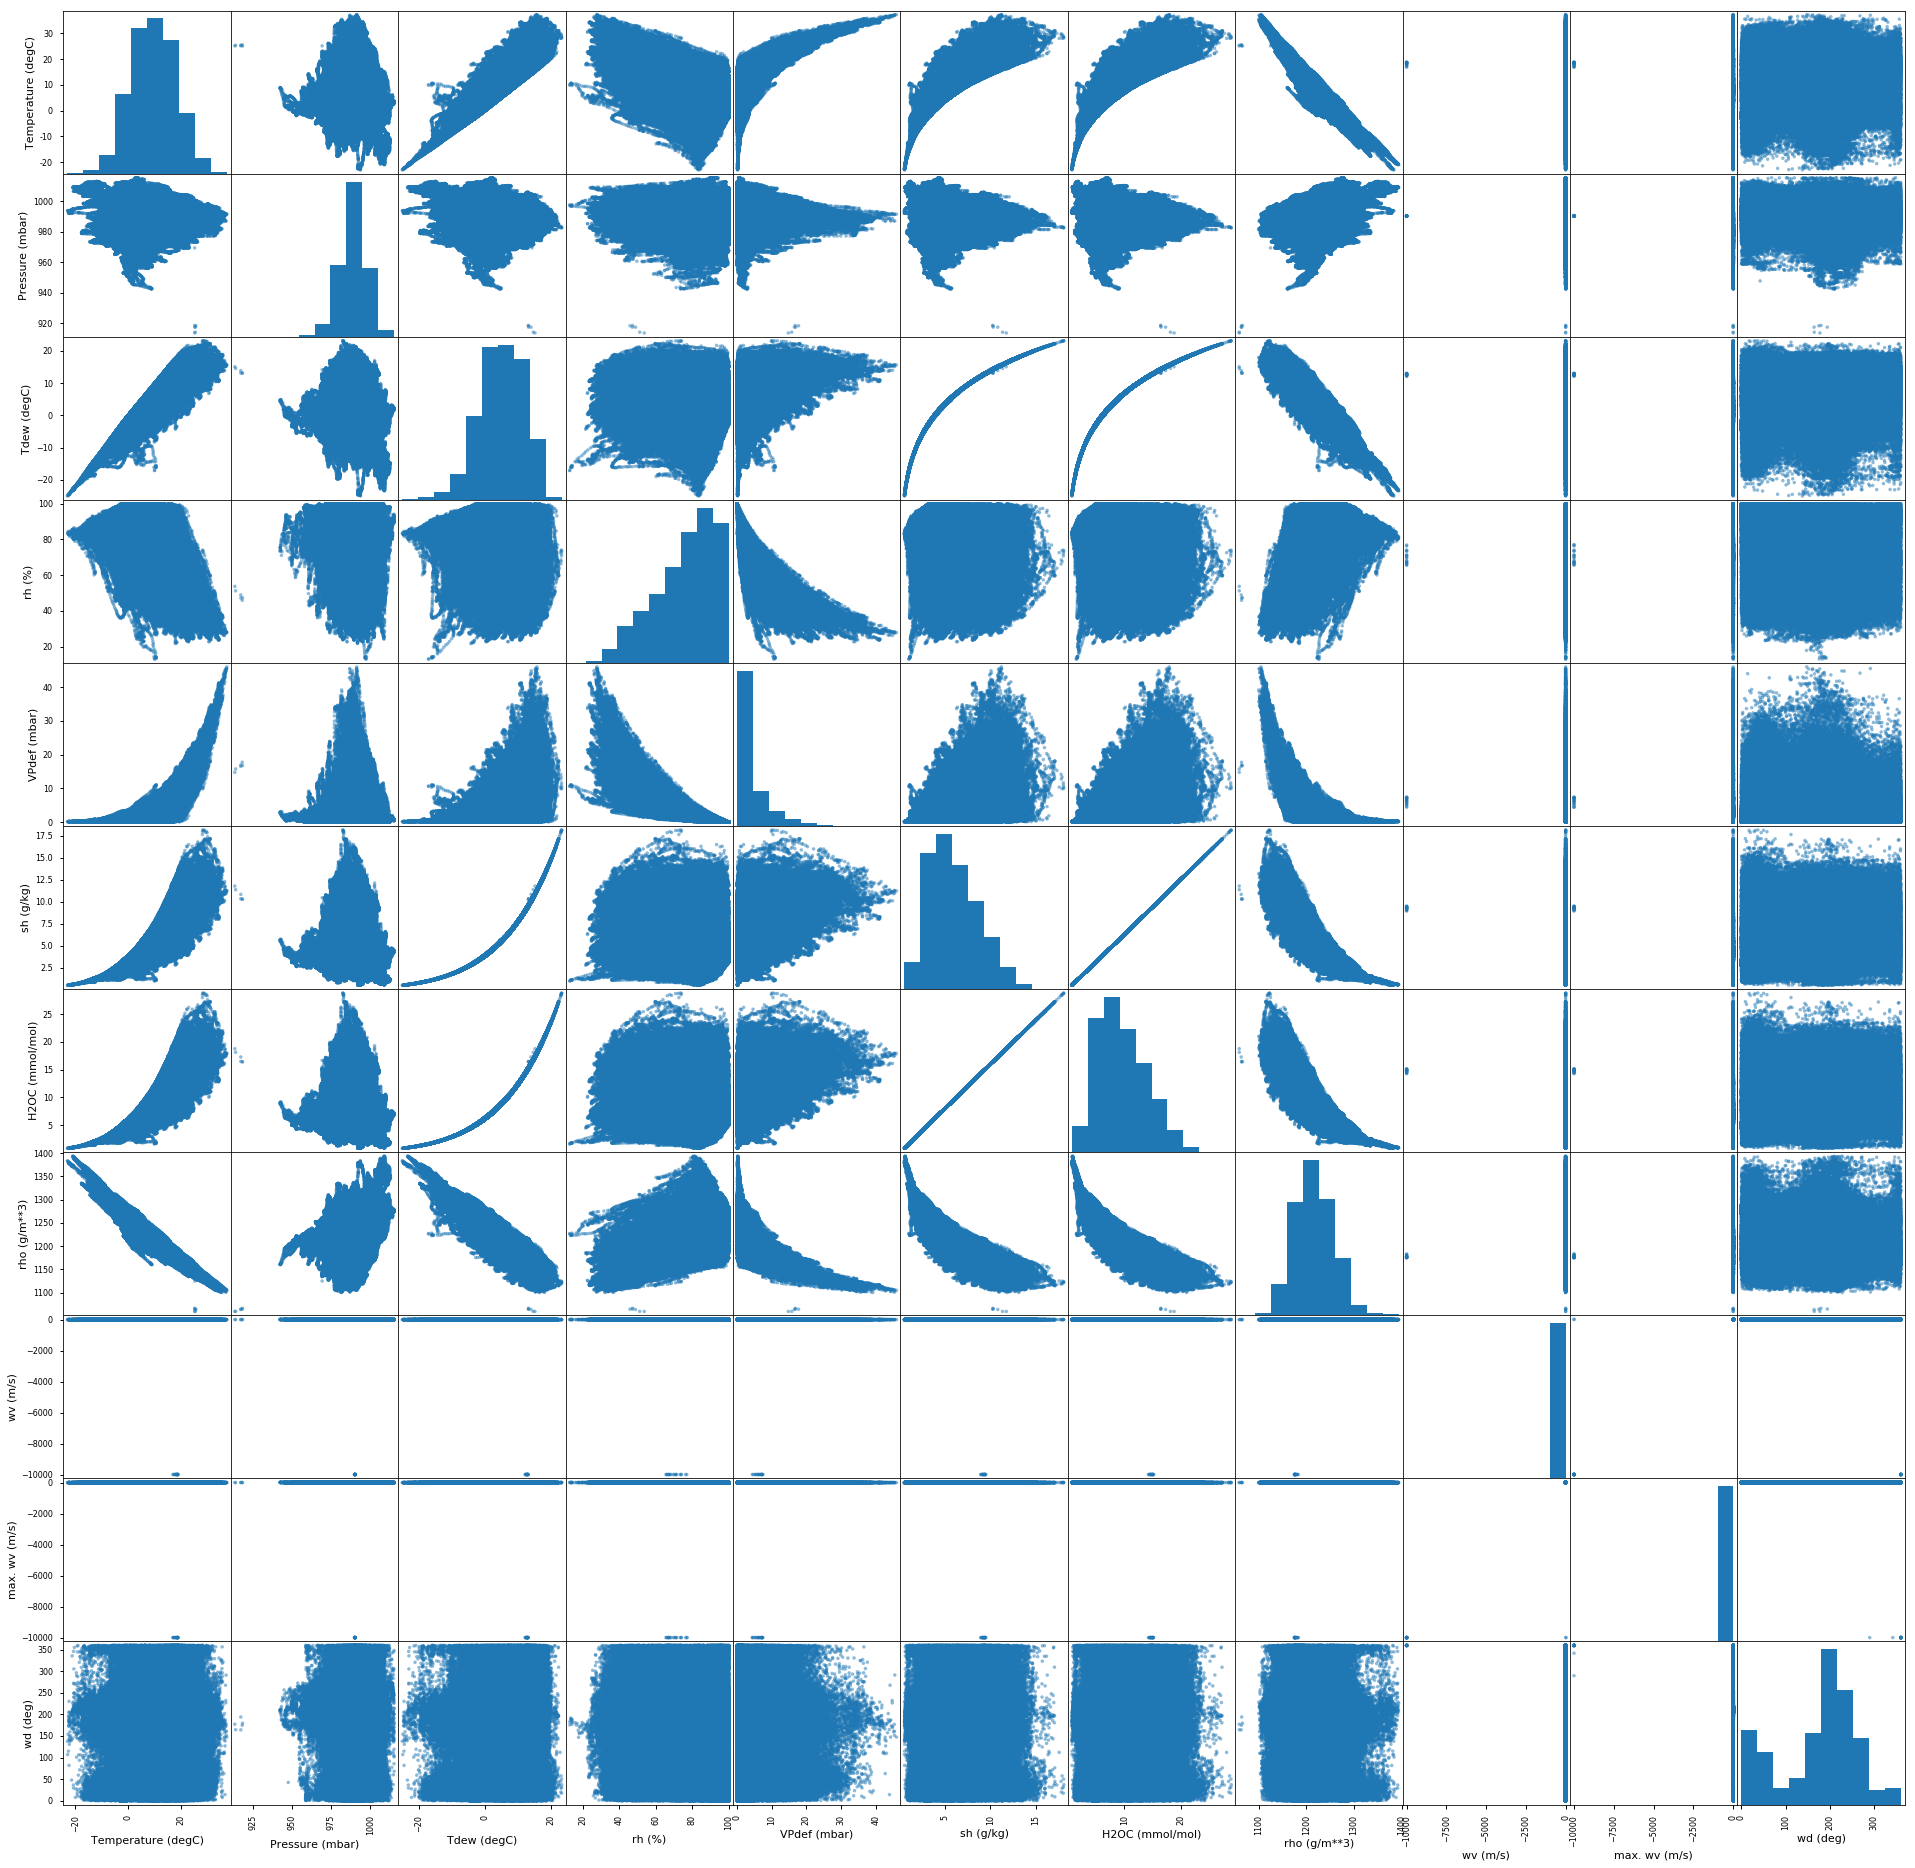

In [23]:
pd.plotting.scatter_matrix(df_scatter, figsize = (33.0, 33.0))  

1. Pressure (mbar),wv (m/s),max. wv (m/s),wd (deg) 和Temperature (degC)幾乎無相關
2. Tdew (degC) sh (g/kg) H2OC (mmol/mol)和Temperature (degC)正相關大 ,rho (g/m**3)和Temperature (degC)負相關大
3. sh (g/kg) H2OC (mmol/mol) 分布幾乎一樣，相關為1，和Tdew (degC)相關幾乎1
4. Pressure (mbar)都聚集在950-1000,而wv (m/s) max. wv (m/s)都在1附近，因此造成上面heatmap可能是因為資料沒有正規化，導致這些資料影響變低

### 4.Improve the linear regression from question 1

In [26]:
# Create a Lasso regressor
Weather_lasso = linear_model.Lasso(alpha=.3)
Weather_lasso.fit(X_train, y_train) 
print('Coeff and intercept:', Weather_lasso.coef_,  Weather_lasso.intercept_)

print('Training Score:', Weather_lasso.score(X_train, y_train))
print( 'Testing Score:', Weather_lasso.score(X_test, y_test) )

print('Training MSE: ', np.mean((Weather_lasso.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((Weather_lasso.predict(X_test) - y_test)**2))

Coeff and intercept: [ 2.62085340e-01  0.00000000e+00 -6.51824421e-03  7.06281405e-02
  0.00000000e+00  0.00000000e+00 -2.12269594e-01 -0.00000000e+00
 -0.00000000e+00 -1.78921769e-04] 8.566290888300758
Training Score: 0.9995809967909858
Testing Score: 0.9995812133272785
Training MSE:  0.029686968617836183
Testing MSE:  0.029884077914201685


In [30]:
indexes_non_selected = [1, 4, 5, 7, 8]
print('Non important variable:', X_train.columns[indexes_non_selected])
most_important_index=[0]
print('Most important variable:', X_train.columns[most_important_index])
ind = np.argsort(np.abs(Weather_lasso.coef_))
print('Order variable (from less to more important):', X_train.columns[ind])

Non important variable: Index(['Tdew (degC)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'wv (m/s)',
       'max. wv (m/s)'],
      dtype='object')
Most important variable: Index(['Pressure (mbar)'], dtype='object')
Order variable (from less to more important): Index(['Tdew (degC)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'wv (m/s)',
       'max. wv (m/s)', 'wd (deg)', 'rh (%)', 'VPdef (mbar)', 'rho (g/m**3)',
       'Pressure (mbar)'],
      dtype='object')


In [45]:
# 正規化後train
from sklearn.preprocessing import StandardScaler
# Create the transformer StandardScaler for data and target
y_train = y_train.values
y_test = y_test.values
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

# Normalization of train and test data using mean and variance of the training
Standard_X_train = scalerX.transform(X_train)
Standard_y_train = scalery.transform(y_train.reshape(-1, 1))
Standard_X_test = scalerX.transform(X_test)
Standard_y_test = scalery.transform(y_test.reshape(-1, 1))

# Create a Lasso regressor
Standard_Weather_lasso = linear_model.Lasso(alpha=.3)
Standard_Weather_lasso.fit(Standard_X_train, Standard_y_train) 
print('Coeff and intercept:', Standard_Weather_lasso.coef_,  Standard_Weather_lasso.intercept_)

print('Training Score:', Standard_Weather_lasso.score(Standard_X_train, Standard_y_train))
print( 'Testing Score:', Standard_Weather_lasso.score(Standard_X_test, Standard_y_test) )

Coeff and intercept: [ 0.          0.05257006 -0.          0.01612511  0.          0.
 -0.60556952 -0.         -0.          0.        ] [1.8053653e-15]
Training Score: 0.8450363681930131
Testing Score: 0.8453870855529999


In [47]:
# 正規化後比較
indexes_non_selected = [0, 2, 4, 5, 7, 8, 9]
print('Non important variable:', X_train.columns[indexes_non_selected])
most_important_index=[6]
print('Most important variable:', X_train.columns[most_important_index])
ind = np.argsort(np.abs(Standard_Weather_lasso.coef_))
print('Order variable (from less to more important):', X_train.columns[ind])

Non important variable: Index(['Pressure (mbar)', 'rh (%)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'wv (m/s)',
       'max. wv (m/s)', 'wd (deg)'],
      dtype='object')
Most important variable: Index(['rho (g/m**3)'], dtype='object')
Order variable (from less to more important): Index(['Pressure (mbar)', 'rh (%)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'wv (m/s)',
       'max. wv (m/s)', 'wd (deg)', 'VPdef (mbar)', 'Tdew (degC)',
       'rho (g/m**3)'],
      dtype='object')
